<h1>ML Data Cleaning and Feature Selection</h1>

About Dataset

https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

<b>New York City Airbnb Open Data</b><br>
<br>Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

Content

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

Acknowledgements

This public dataset is part of Airbnb, and the original source can be found on this website.

Inspiration

What can we learn about different hosts and areas?
What can we learn from predictions? (ex: locations, prices, reviews, etc)
Which hosts are the busiest and why?
Is there any noticeable difference of traffic among different areas and what could be the reason for it?

### Aim:

The project aims at answering the following question with the current dataset.
* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much? 

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

ML Data Cleaning and Feature Selection













For categorical data, calculate the accuracy and a confusion matrix.



In [104]:
url = "https://raw.githubusercontent.com/midhunmohank/DS/master/Datasets/AB_NYC_2019.csv"
df = pd.read_csv(url)

In [105]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [106]:
#Rearraging the response varaible i.e Price column to the end of the dataframe
column_to_move = df.pop("price")

# insert column with insert(location, column_name, column_value)

df.insert(15, "price", column_to_move)

In [107]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,2018-10-19,0.21,6,365,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,2019-05-21,0.38,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,NaN,NaN,1,365,150
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,2019-07-05,4.64,1,194,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,2018-11-19,0.10,1,0,80


<h3>Dropping the following customer data sensitive features:</h3>
<l>
<li>id</li>
<li>name</li>
<li>host_id</li>
<li>host_name</li>
<li>last_review</li>
</l>

In [108]:
df.drop(["id","name","host_id","host_name","last_review","latitude","longitude"],axis=1,inplace= True)

In [109]:
#Checking changes
df.head(5)

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,Brooklyn,Kensington,Private room,1,9,0.21,6,365,149
1,Manhattan,Midtown,Entire home/apt,1,45,0.38,2,355,225
2,Manhattan,Harlem,Private room,3,0,NaN,1,365,150
3,Brooklyn,Clinton Hill,Entire home/apt,1,270,4.64,1,194,89
4,Manhattan,East Harlem,Entire home/apt,10,9,0.10,1,0,80


In [110]:
df.shape

(48895, 9)

### What are the data types? (Only numeric and categorical)

In [111]:
df.dtypes

neighbourhood_group                object
neighbourhood                      object
room_type                          object
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
price                               int64
dtype: object

The dataset has <b>4</b> Categorical and <b>8</b> Numerical Features.

### Are there missing values?

In [112]:
df.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

### Which independent variables have missing data? How much? 

"number_of_reviews" feature has 10052 missing values. For this feature, missing data will be replaced with mean. Since the data is more symmetric, mean replacement would be better.

In [113]:
mean = df["reviews_per_month"].mean()
df["reviews_per_month"].fillna(mean, inplace=True)
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price                             0
dtype: int64

Before examining price feature, categorical variables will be mapped with help of cat.code. This will assist to make easier and comprehensible data analysis.

In [114]:
df['neighbourhood_group']= df['neighbourhood_group'].astype("category").cat.codes
df['neighbourhood'] = df['neighbourhood'].astype("category").cat.codes
df['room_type'] = df['room_type'].astype("category").cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  int8   
 1   neighbourhood                   48895 non-null  int16  
 2   room_type                       48895 non-null  int8   
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               48895 non-null  float64
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
 8   price                           48895 non-null  int64  
dtypes: float64(1), int16(1), int64(5), int8(2)
memory usage: 2.4 MB


### What are the likely distributions of the numeric variables? & What are the distributions of the predictor variables?   

/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

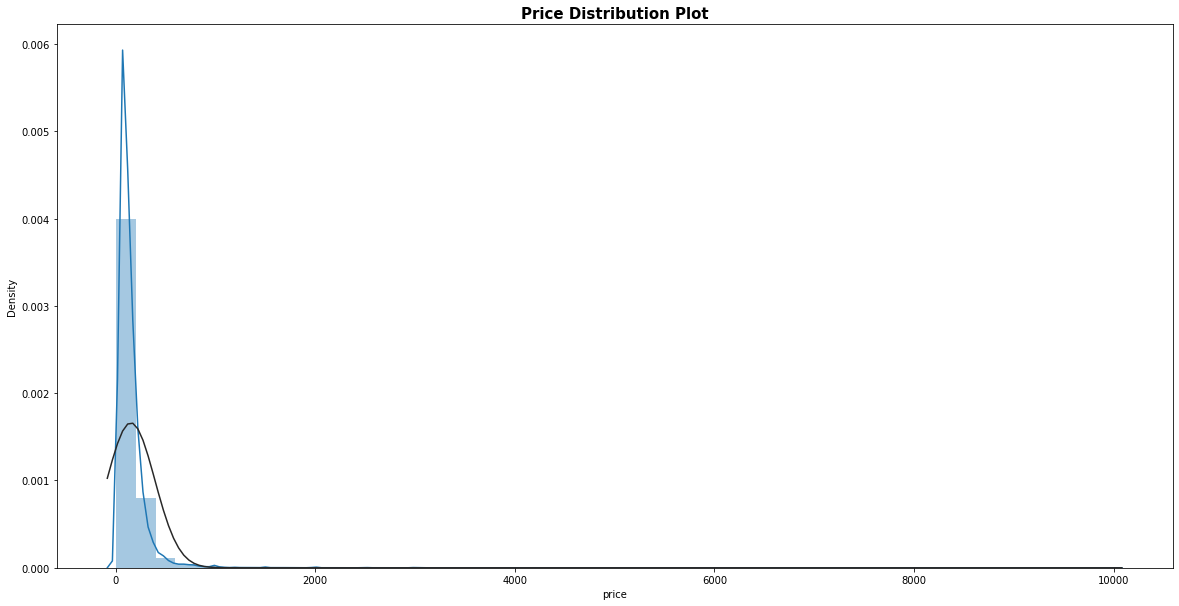

In [115]:
#Distribution of Price

plt.figure(figsize=(20,10))
sns.distplot(df['price'], fit = norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

The above distribution graph shows that there is a right-skewed distribution on price. This means there is a positive skewness. Log transformation will be used to make this feature less skewed. This will help to make easier interpretation and better statistical analysis

Since division by zero is a problem, log+1 transformation would be better.

In [116]:
dfColumnList = df.columns 

In [117]:
df['price_log'] = np.log(df.price+1)

In [118]:
df.drop('price', axis=1, inplace=True)

/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

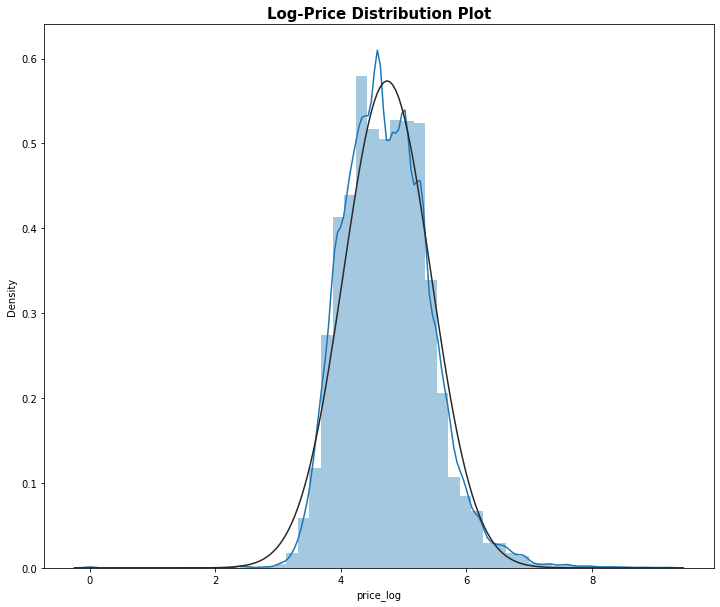

In [119]:
plt.figure(figsize=(12,10))
sns.distplot(df['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

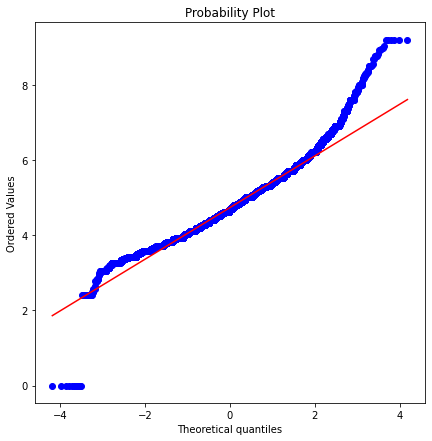

In [120]:
plt.figure(figsize=(7,7))
stats.probplot(df['price_log'], plot=plt)
plt.show()

In below above, the good fit indicates that normality is a reasonable approximation.

<h5>Distribution of Predictors</h5>

/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

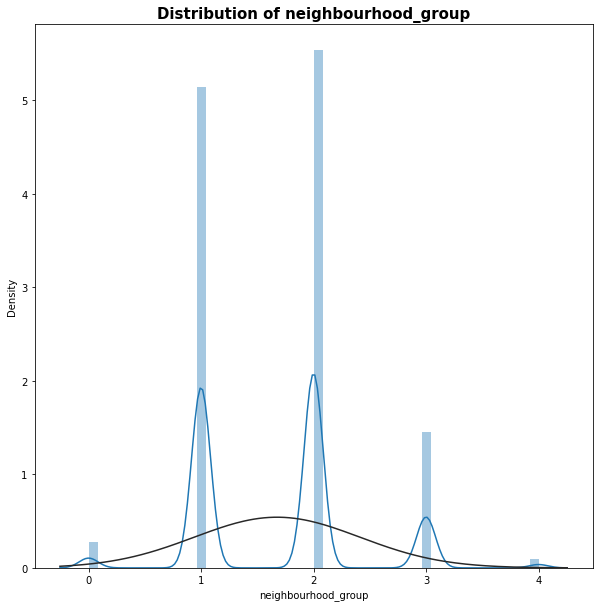

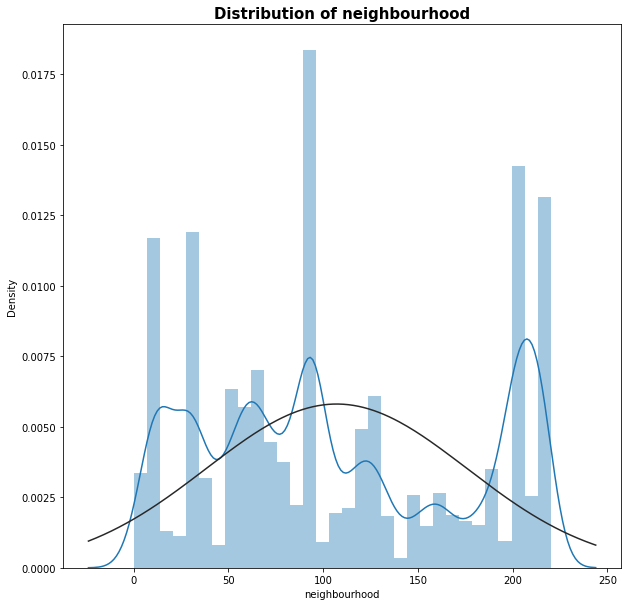

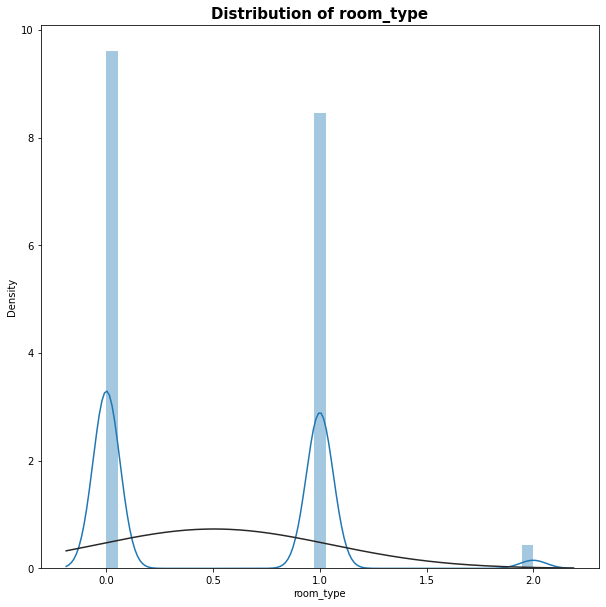

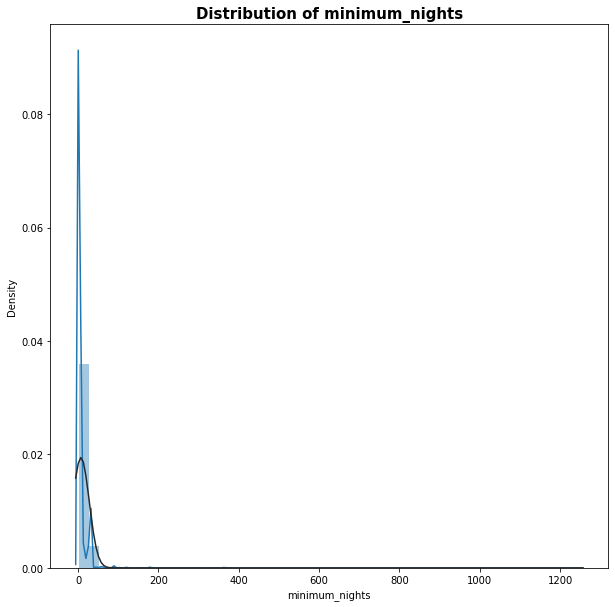

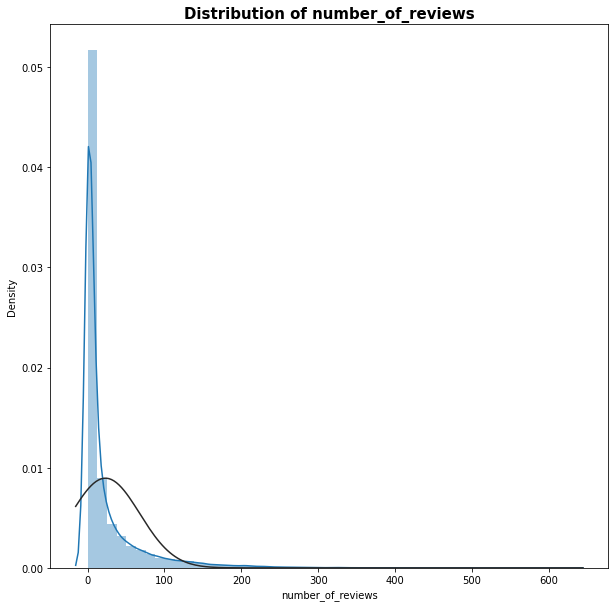

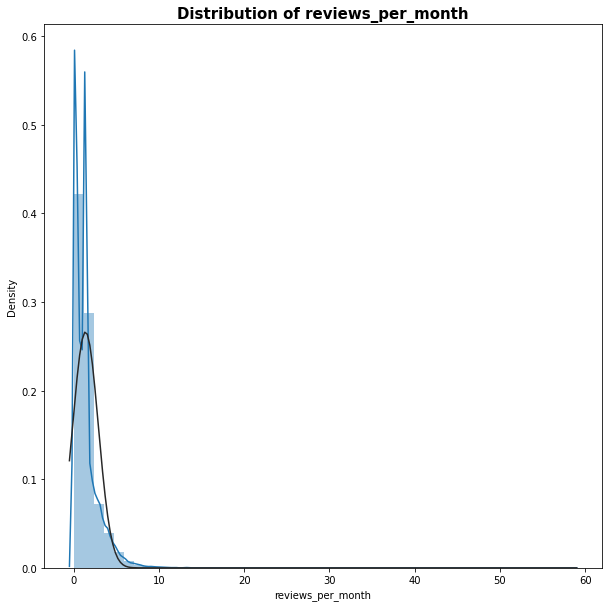

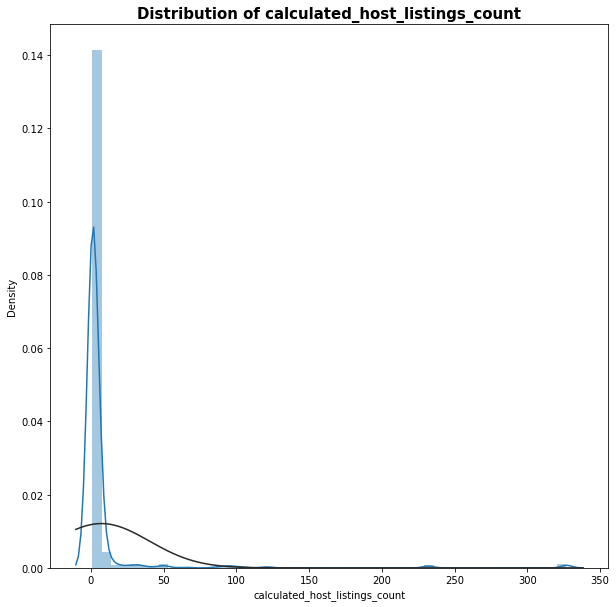

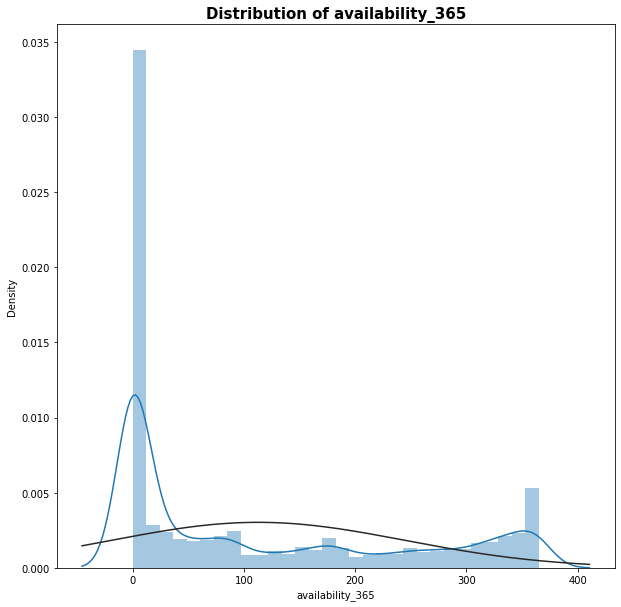

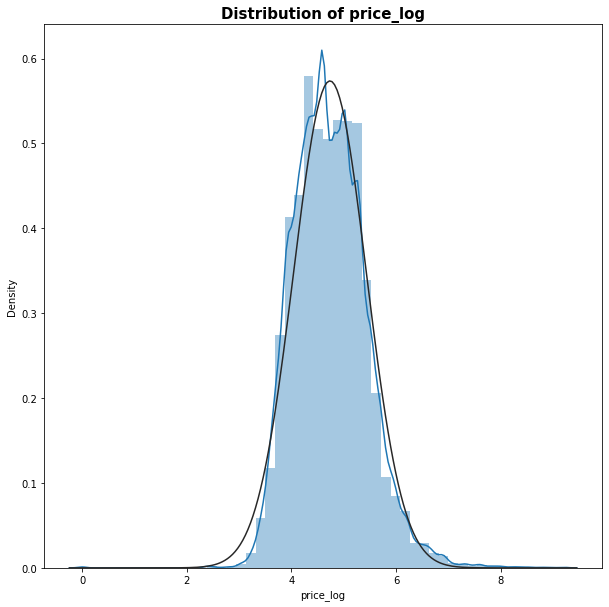

In [121]:
dfColumnList = df.columns 
for i in dfColumnList:
  plt.figure(figsize= (10,10))
  sns.distplot(df[i], fit = norm)
  plt.title(f"Distribution of {i}",size = 15, weight = "bold")

All predictors have a right skewed positve distribution. The skewness of the price has been normalised. The skewness of predictors will be normalised in further steps.

### Do the ranges of the predictor variables make sense?

In [122]:
#Range of each column
df.max() - df.min()


neighbourhood_group                  4.00000
neighbourhood                      220.00000
room_type                            2.00000
minimum_nights                    1249.00000
number_of_reviews                  629.00000
reviews_per_month                   58.49000
calculated_host_listings_count     326.00000
availability_365                   365.00000
price_log                            9.21044
dtype: float64

The range of "minimum nights" variable is high, this implies high variablity in it's distribution.

### In the predictor variables independent of all the other predictor variables?

### Multicollinearity
Multicollinearity will help to measure the relationship between explanatory variables in multiple regression. If there is multicollinearity occurs, these highly related input variables should be eliminated from the model.

In this kernel, multicollinearity will be control with Eigen vector values results.

In [123]:
corr= df.corr(method='pearson')

#Eigen vector of a correlation matrix.
multicollinearity, V=np.linalg.eig(corr)
multicollinearity

array([1.76250436, 1.63206895, 0.36026299, 0.46423692, 1.25650275,
       1.07215853, 0.90291931, 0.83315611, 0.71619008])

None one of the eigenvalues of the correlation matrix is close to zero. It means that there is no multicollinearity exists in the data.

### Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

<b>For a regression model, the most useful Independent Variables can be statistically determined using the following methods:
1. Univariate Selection
2. Feature Importance
3. Correlation Matrix with Heatmap

Each of the following method is applied below to the dataset.</b>

#### 1. Univariate Selction

In [124]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:8]
y = df.iloc[:,-1]
y=y.astype('int')
# y = pd.DataFrame(y)
y.head(10)
y.describe()


count    48895.000000
mean         4.253298
std          0.760306
min          0.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          9.000000
Name: price_log, dtype: float64

In [125]:
#Applying SelectKBest class to extract top features
bestFeatures = SelectKBest(score_func= chi2, k = 8)
fit = bestFeatures.fit(X,y)


In [126]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [127]:
#Conact two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores], axis = 1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,neighbourhood_group,92.192926
1,neighbourhood,40931.654560
2,room_type,10059.982210
3,minimum_nights,8080.854858
4,number_of_reviews,29459.835799
5,reviews_per_month,144.557040
6,calculated_host_listings_count,178845.144014
7,availability_365,101613.481185


In [128]:
#Ordering methods from highest importance to lowest
print(featureScores.nlargest(10,'Score'))

                            Specs          Score
6  calculated_host_listings_count  178845.144014
7                availability_365  101613.481185
1                   neighbourhood   40931.654560
4               number_of_reviews   29459.835799
2                       room_type   10059.982210
3                  minimum_nights    8080.854858
5               reviews_per_month     144.557040
0             neighbourhood_group      92.192926


#### 2.Feature Importance

In [129]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [130]:
print(model.feature_importances_)

[0.05129015 0.13703477 0.1620069  0.1325064  0.133747   0.1670646
 0.07694949 0.13940067]


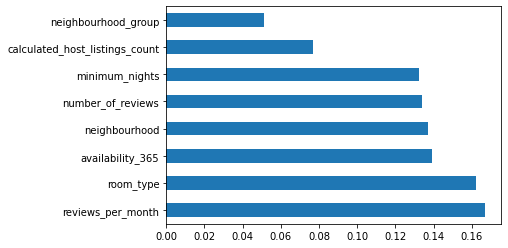

In [131]:
#Plot graph of feature importance for better visualization
feat_importances = pd.Series(model.feature_importances_,index = X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

#### 3. Correlation Matrix with HeatMap

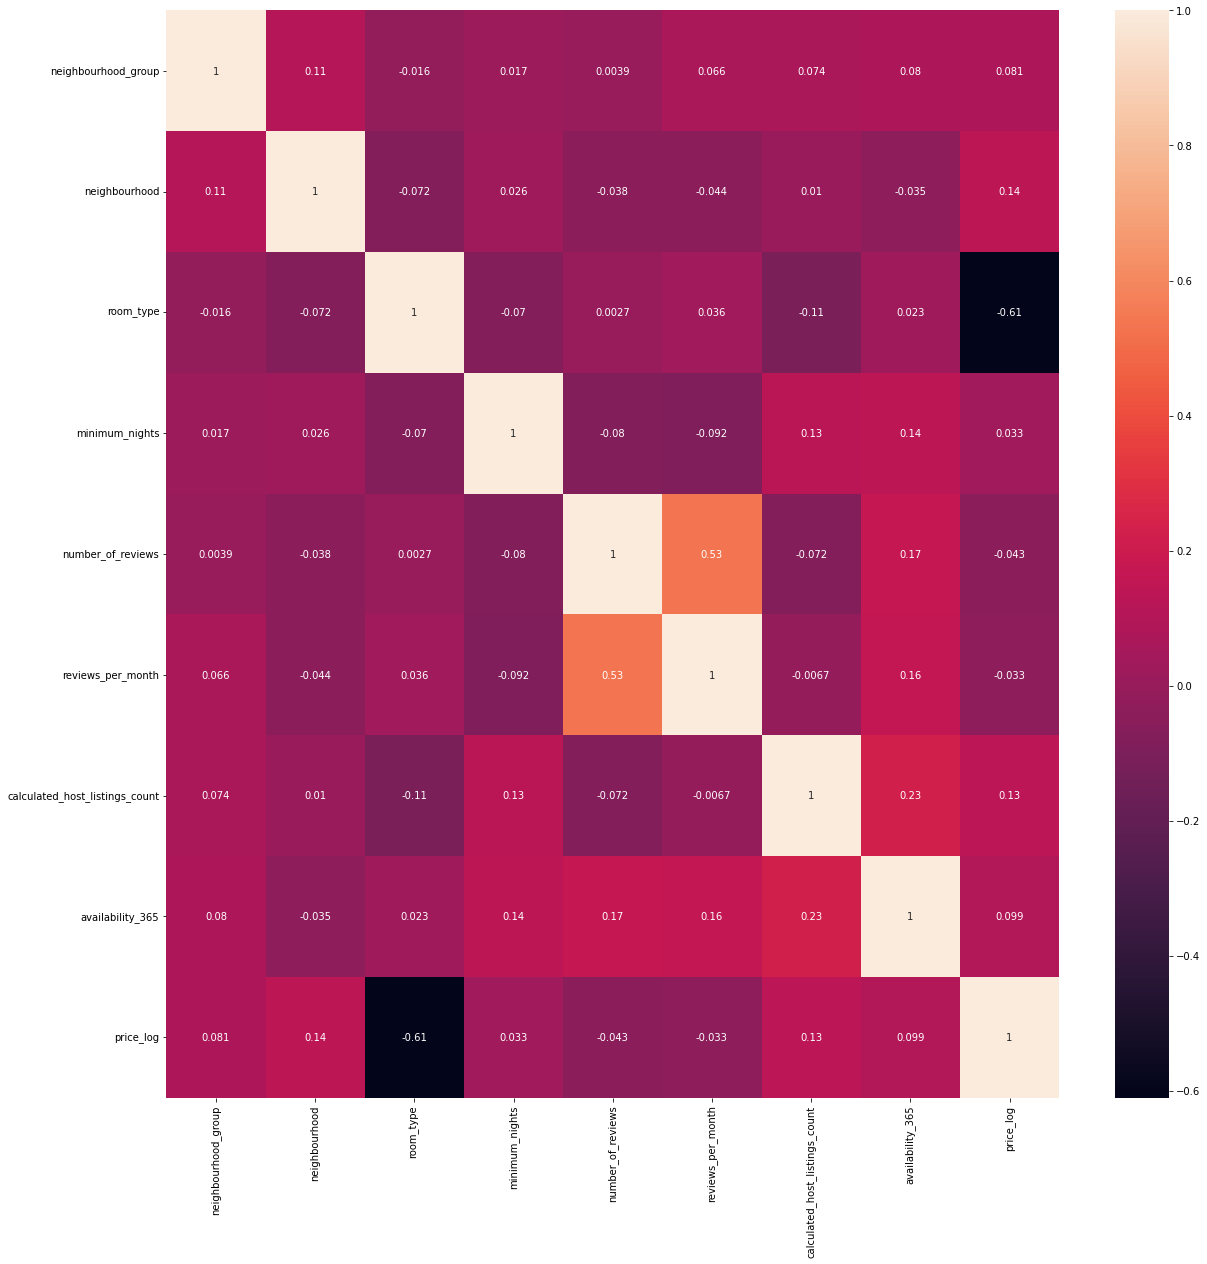

In [132]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
#plot heatmap
g = sns.heatmap(df[top_corr_features].corr(), annot= True)

<h3>Outlier Treatment</h3>

<h4> Residual Plots </h4>
Residual Plot is strong method to detect outliers, non-linear data and detecting data for regression models. The below charts show the residual plots for each feature with the price.

A ideal Residual Plot, the red line would be horizontal. Based on the below charts, most features are non-linear. On the other hand, there are not many outliers in each feature. 

In [133]:
df_x, df_y = df.iloc[:,:8], df.iloc[:,-1]

/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

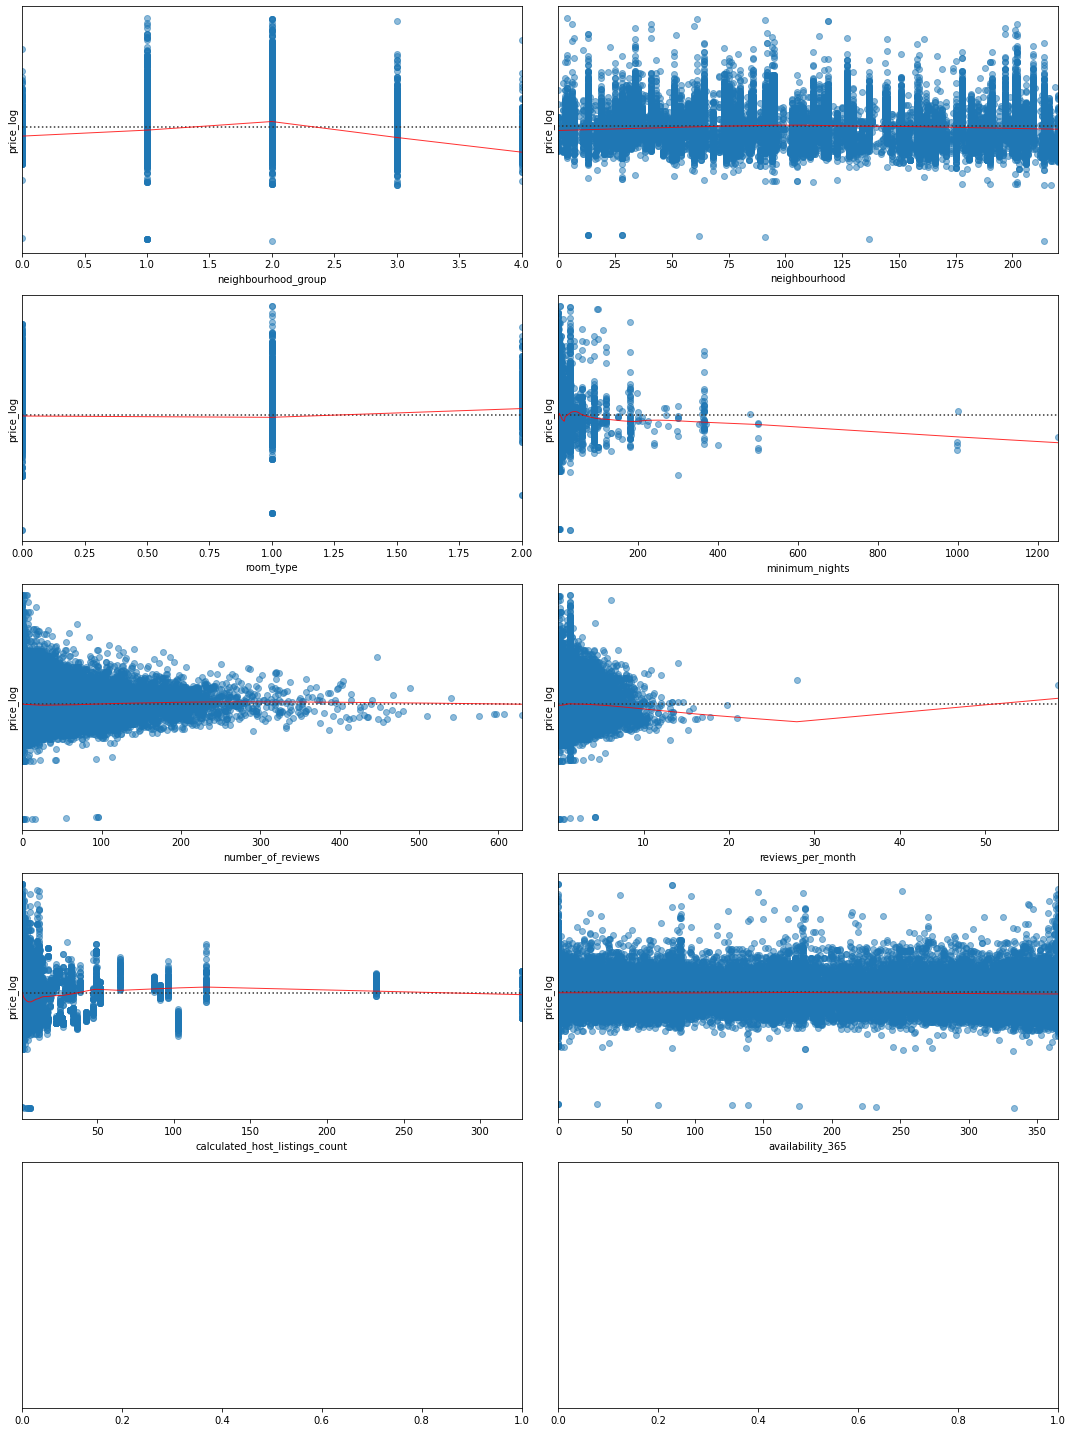

In [134]:
f, axes = plt.subplots(5, 2, figsize=(15, 20))
sns.residplot(df_x.iloc[:,0],df_y, lowess=True, ax=axes[0, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_x.iloc[:,1],df_y, lowess=True, ax=axes[0, 1],
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_x.iloc[:,2],df_y, lowess=True, ax=axes[1, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_x.iloc[:,3],df_y, lowess=True, ax=axes[1, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_x.iloc[:,4],df_y, lowess=True, ax=axes[2, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_x.iloc[:,5],df_y, lowess=True, ax=axes[2, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_x.iloc[:,6],df_y, lowess=True, ax=axes[3, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_x.iloc[:,7],df_y, lowess=True, ax=axes[3, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
# sns.residplot(df_x.iloc[:,8],df_y, lowess=True, ax=axes[4, 0], 
#                           scatter_kws={'alpha': 0.5}, 
#                           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
# sns.residplot(df_x.iloc[:,9],df_y, lowess=True, ax=axes[4, 1], 
#                           scatter_kws={'alpha': 0.5}, 
#                           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.setp(axes, yticks=[])
plt.tight_layout()


In [135]:
df.describe()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.675345,107.122732,0.504060,7.029962,23.274466,1.373221,7.143982,112.781327,4.736885
std,0.735816,68.743096,0.545379,20.510550,44.550582,1.497775,32.952519,131.622289,0.695344
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.000000,51.000000,0.000000,1.000000,1.000000,0.280000,1.000000,0.000000,4.248495
50%,2.000000,94.000000,0.000000,3.000000,5.000000,1.220000,1.000000,45.000000,4.672829
75%,2.000000,178.000000,1.000000,5.000000,24.000000,1.580000,2.000000,227.000000,5.170484
max,4.000000,220.000000,2.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,9.210440


In [136]:
# df.price.describe()
# plt.figure(figsize = (20,10))
# sns.boxplot(df['price_log'])

The outliers in price is removed and the residuals are checked again.

In [137]:
#calculating minimum and maximum threshold
min_threshold, max_threshold = df.price_log.quantile([0.01,0.95])
min_threshold, max_threshold

(3.4339872044851463, 5.87493073085203)

In [138]:
# checking
df[df.price_log<min_threshold]

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
957,4,87,1,3,80,0.920000,1,226,3.044522
2675,1,74,2,2,5,0.070000,1,321,3.401197
2860,2,64,0,30,0,1.373221,4,137,2.397895
3020,3,217,1,2,386,5.530000,3,50,3.401197
3918,1,13,2,5,76,1.220000,3,258,3.258097
...,...,...,...,...,...,...,...,...,...
48486,3,79,0,9,1,1.000000,1,322,2.833213
48647,3,164,1,2,0,1.373221,1,24,3.367296
48832,1,74,2,1,0,1.373221,3,363,3.044522
48867,1,89,2,1,0,1.373221,6,338,3.258097


In [139]:
# filtering the outliers and saving the data to a new dataframe data2
df_cleaned = df[(df.price_log>min_threshold)&(df.price_log<max_threshold)]
df_cleaned.shape

(45785, 9)

In [140]:
df_cleaned_x, df_cleaned_y = df_cleaned.iloc[:,:8], df_cleaned.iloc[:,-1]

/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

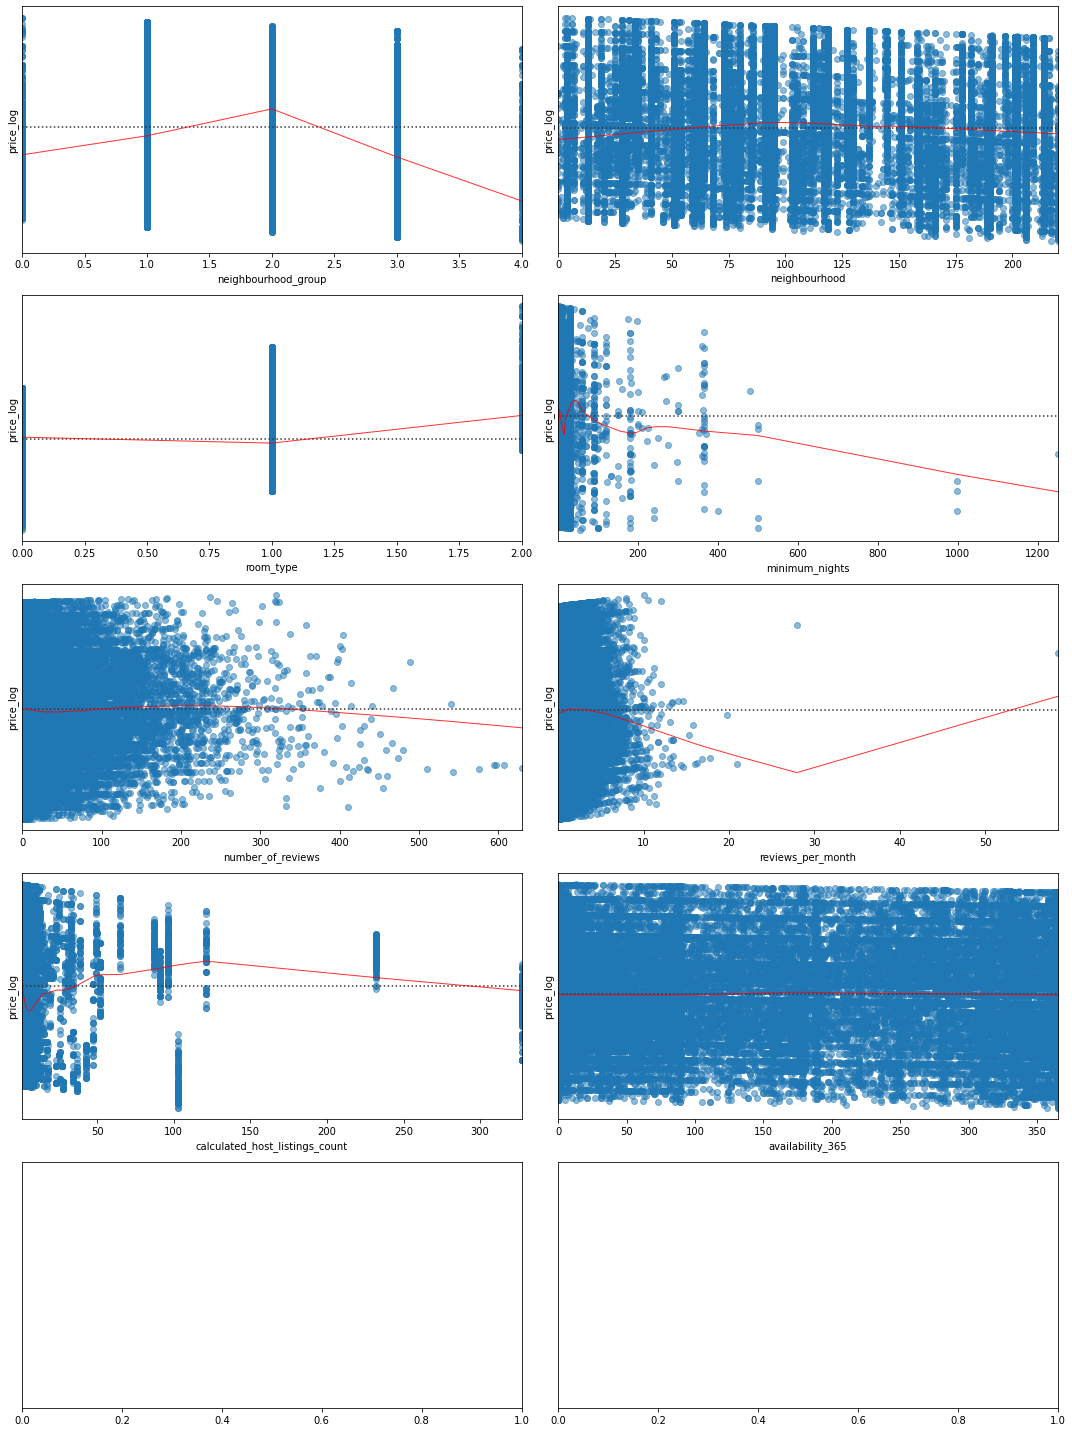

In [141]:
f, axes = plt.subplots(5, 2, figsize=(15, 20))
sns.residplot(df_cleaned_x.iloc[:,0],df_cleaned_y, lowess=True, ax=axes[0, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_cleaned_x.iloc[:,1],df_cleaned_y, lowess=True, ax=axes[0, 1],
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_cleaned_x.iloc[:,2],df_cleaned_y, lowess=True, ax=axes[1, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_cleaned_x.iloc[:,3],df_cleaned_y, lowess=True, ax=axes[1, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_cleaned_x.iloc[:,4],df_cleaned_y, lowess=True, ax=axes[2, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_cleaned_x.iloc[:,5],df_cleaned_y, lowess=True, ax=axes[2, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_cleaned_x.iloc[:,6],df_cleaned_y, lowess=True, ax=axes[3, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(df_cleaned_x.iloc[:,7],df_cleaned_y, lowess=True, ax=axes[3, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
# sns.residplot(df_cleaned_x.iloc[:,8],df_cleaned_y, lowess=True, ax=axes[4, 0], 
#                           scatter_kws={'alpha': 0.5}, 
#                           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
# sns.residplot(df_cleaned_x.iloc[:,9],df_cleaned_y, lowess=True, ax=axes[4, 1], 
#                           scatter_kws={'alpha': 0.5}, 
#                           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.setp(axes, yticks=[])
plt.tight_layout()

The above plot shows the features after the outliers in the target variable is eliminated. The red residual line has become linear.

### Feature Selection and GridSearch


Since 'price' is normalised to remove the skewness, Standard Scaler technique will be used to normalize the data set. Thus, each feature has 0 mean and 1 standard deviation.

In [142]:
scaler = StandardScaler()
#Dataframe df with outliers 
df_x = scaler.fit_transform(df_x)
#Dataframe with no outliers
df_cleaned_x = scaler.fit_transform(df_cleaned_x)


### Which predictor variables are the most important?

Now it is time to build a feature importance graph. For this Extra Trees Classifier method will be used. In the below code, lowess=True makes sure the lowest regression line is drawn.

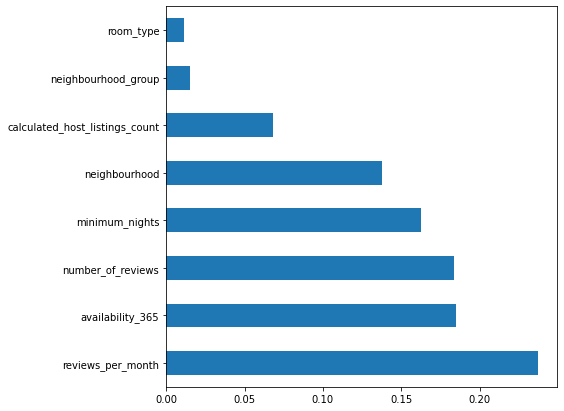

In [143]:
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(df_x,lab_enc.fit_transform(df_y))
plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=df.iloc[:,:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


<h3>Model Buidling </h3>

Correlation matrix, Residual Plots and Multicollinearity results show that underfitting occurs on the model and there is no multicollinearity on the independent variables. 

In model building section, Linear Regression model will be built.


<h4>Linear Regression Model</h4>


In [144]:
#Linear Regression 
def linear_reg(input_x, input_y, cv = 5):
    model_LR = LinearRegression()

    parameters = {'fir_intercept':[True, False], 'normalize':[True,False], 'copy_X':[True,False]}

    #Buidling Grid Search algorithm with cross-validation and Mearn Squared Error score

    grid_search_LR = GridSearchCV(estimator = model_LR,
                        param_grid = parameters,
                        scoring = 'neg_mean_squared_error',
                        cv = cv,
                        n_jobs = -1)

    #Finding the best parameters

    grid_search_LR.fir(input_x,input_y)
    best_parameters_LR = grid_search_LR.best_params_
    best_score_LR = grid_search_LR.best_score_
    print(best_parameters_LR)
    print(best_score_LR)

### Do the training and test sets have the same data?
The train and test sets are split at a ratio of 70/30 from the same dataset. But both sets are distinct and is not seen by the model during the training phase. 

### Phase 1

In this phase data is 

In [145]:
#Splitting the dataset with outlier into Train and Test sets at 70-30 proportion
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3,random_state=42)

In [146]:
##Linear Regression
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)

/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


### Phase 2

In [147]:
#Splitting the dataset with outlier into Train and Test sets at 70-30 proportion
Xclean_train, Xclean_test, yclean_train, yclean_test = train_test_split(df_cleaned_x, df_cleaned_y, test_size=0.3,random_state=42)
##Linear Regression
lr_clean = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr.fit(Xclean_train, yclean_train)
lr_clean_pred= lr.predict(Xclean_test)

/Users/midhunmohan/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


### Result Comparison

In this part, 3 metrics will be calculated for evaluating predictions.

Mean Absolute Error (MAE) shows the difference between predictions and actual values.

Root Mean Square Error (RMSE) shows how accurately the model predicts the response.

R^2 will be calculated to find the goodness of fit measure.

In [148]:
print('-------------Lineer Regression-----------')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(yclean_test, lr_clean_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(yclean_test, lr_clean_pred)))   
print('R2 %f' % r2_score(yclean_test, lr_clean_pred))

-------------Lineer Regression-----------
--Phase-1--
MAE: 0.392709
RMSE: 0.530889
R2 0.403666
--Phase-2--
MAE: 0.334771
RMSE: 0.421064
R2 0.445928


The results show that both phases have different prediction results. Phase 1 and 2 have a great difference for each metric. MAE, RMSE metric values are decreasd in Phase 2 it means, the prediction error value is lower in that Phase and model explainability has increased by a low margin.

The MAE value of 0 indicates no error on the model.<br>
In other words, there is a perfect prediction. The above results show that all predictions have great error especially in phase 2.
RMSE gives an idea of how much error the system typically makes in its predictions. The above results show that RMSE gave a better value after removing the outliers
R2 represents the proportion of the variance for a dependent variable that's explained by an independent variable. The above results show that, in phase 1, 40% of data fit the regression model while in phase 2, 44% of data fit the regression model.

### Data Imputation

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [149]:
df_imputation= df[['price_log']]
df_imputation['1_percent'] = df_imputation[['price_log']]
df_imputation['5_percent'] = df_imputation[['price_log']]
df_imputation['10_percent'] = df_imputation[['price_log']]
# df_imputation['sample_num'] = df_imputation[['Unnamed: 0']]
# df_imputation['sample_num'] = df_imputation['sample_num']/1000
df_imputation.head()

/var/folders/6n/jn9tfjdx2f98kc2l68s832bm0000gn/T/ipykernel_4104/3717668723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputation['1_percent'] = df_imputation[['price_log']]
/var/folders/6n/jn9tfjdx2f98kc2l68s832bm0000gn/T/ipykernel_4104/3717668723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputation['5_percent'] = df_imputation[['price_log']]
/var/folders/6n/jn9tfjdx2f98kc2l68s832bm0000gn/T/ipykernel_4104/3717668723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

,price_log,1_percent,5_percent,10_percent
0,5.010635,5.010635,5.010635,5.010635
1,5.420535,5.420535,5.420535,5.420535
2,5.017280,5.017280,5.017280,5.017280
3,4.499810,4.499810,4.499810,4.499810
4,4.394449,4.394449,4.394449,4.394449


In [150]:
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [151]:
print(get_percent_missing(df_imputation))

           column_name  percent_missing
price_log    price_log              0.0
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [152]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [153]:
create_missing(df_imputation, 0.01, '1_percent')
create_missing(df_imputation, 0.05, '5_percent')
create_missing(df_imputation, 0.1, '10_percent')

/var/folders/6n/jn9tfjdx2f98kc2l68s832bm0000gn/T/ipykernel_4104/1572422757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan


In [154]:
print(get_percent_missing(df_imputation))

           column_name  percent_missing
price_log    price_log         0.000000
1_percent    1_percent         1.000102
5_percent    5_percent         5.000511
10_percent  10_percent        10.001023


In [155]:
# Store Index of NaN values in each coloumns
number_1_idx = list(np.where(df_imputation['1_percent'].isna())[0])
number_5_idx = list(np.where(df_imputation['5_percent'].isna())[0])
number_10_idx = list(np.where(df_imputation['10_percent'].isna())[0])

In [156]:
print(f"Length of number_1_idx is {len(number_1_idx)} and it contains {(len(number_1_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")
print(f"Length of number_5_idx is {len(number_5_idx)} and it contains {(len(number_5_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")
print(f"Length of number_10_idx is {len(number_10_idx)} and it contains {(len(number_10_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")

Length of number_1_idx is 489 and it contains 1.0001022599447797% of total data in column | Total rows: 48895
Length of number_5_idx is 2445 and it contains 5.0005112997238985% of total data in column | Total rows: 48895
Length of number_10_idx is 4890 and it contains 10.001022599447797% of total data in column | Total rows: 48895


### KNN Imputation

The k nearest neighbours is an algorithm that is used for simple classification. The algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. 

In [157]:
#Creating a seperate dataframe for performing the KNN imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
df_imputation1 = df_imputation[['1_percent','5_percent','10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_imputation1), columns = df_imputation1.columns)

In [158]:
# imputed_number_df.sample(10)
imputed_number_df.head()

,1_percent,5_percent,10_percent
0,5.010635,5.010635,5.010635
1,5.420535,5.420535,5.420535
2,5.017280,5.017280,5.017280
3,4.499810,4.499810,4.499810
4,4.394449,4.394449,4.394449


In [159]:
print(get_percent_missing(imputed_number_df))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [160]:
price = df["price_log"]
imputed_mean = pd.concat([price,imputed_number_df])
imputed_mean.columns = ["Price","1_Percent","5_Percent","10_Percent"]
imputed_mean.var()

Price         0.483504
1_Percent     0.483504
5_Percent     0.483499
10_Percent    0.483514
dtype: float64

The KNN based method showed very negotiable variablilty. Therefore this method is acceptable for the current dataset. 

### Mean based Imputation with Simpleimputer

This works by calculating the mean/median of the non-missing values in a column and then replacing the missing values within each column separately and independently from the others. It can only be used with numeric data.

In [161]:
df_imputation_mean = df_imputation[['1_percent','5_percent','10_percent']]

In [162]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(df_imputation_mean)
imputed_train_df = imp_mean.transform(df_imputation_mean)

In [163]:
imputed_mean = pd.DataFrame(imp_mean.fit_transform(df_imputation_mean), columns = df_imputation_mean.columns)
print(get_percent_missing(imputed_mean))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [164]:
price = df["price_log"]
combined_mean = pd.concat([price,imputed_mean])
combined_mean.mean()

0             4.736885
1_percent     4.737405
5_percent     4.736332
10_percent    4.734467
dtype: float64

The Mean based method showed very negotiable variablilty. Therefore this method is acceptable for the current dataset. 

### Imputation Using Multivariate Imputation by Chained Equation (MICE)
This type of imputation works by filling the missing data multiple times. Multiple Imputations (MIs) are much better than a single imputation as it measures the uncertainty of the missing values in a better way. The chained equations approach is also very flexible and can handle different variables of different data types (ie., continuous or binary) as well as complexities such as bounds or survey skip patterns.

In [165]:
df_imputation_mice = df_imputation[['1_percent','5_percent','10_percent']]
print(get_percent_missing(df_imputation_mice))

           column_name  percent_missing
1_percent    1_percent         1.000102
5_percent    5_percent         5.000511
10_percent  10_percent        10.001023


In [166]:
from impyute.imputation.cs import mice

# start the MICE training
imputed_training=mice(df_imputation_mice.values)

In [167]:
imputed_training = pd.DataFrame(imputed_training)
imputed_training.columns = ("1_percent","5_percent","10_percent")

In [168]:
# imputed_mice = pd.DataFrame(imputed_training.fit_transform(df_imputation_mice), columns = df_imputation_mice.columns)
print(get_percent_missing(imputed_training))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [169]:
price = df["price_log"]

In [170]:
combined_mice = pd.concat([price,imputed_training])
combined_mice.columns = ["Price","1_Percent","5_Percent","10_Percent"]
combined_mice.mean()

Price         4.736885
1_Percent     4.736901
5_Percent     4.736934
10_Percent    4.736884
dtype: float64

The MICE method showed very negotiable variablilty. Therefore this method is acceptable for the current dataset. 

References:
1. How to Identify the Most Important Predictor Variables in Regression Models https://blog.minitab.com/en/adventures-in-statistics-2/how-to-identify-the-most-important-predictor-variables-in-regression-models
2. 6 Different Ways to Compensate for Missing Values In a Dataset (Data Imputation with examples) https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779
3. KNN-Mar by Shesh https://colab.research.google.com/drive/1wEfzH165Ycm_EqVgwSz_r7SvILuj0KRW?usp=sharing&pli=1#scrollTo=84b72e78-b39d-4055-91ae-02816f94b8c2
4. Airbnb NYC Price Prediction by dyugu https://www.kaggle.com/code/duygut/airbnb-nyc-price-prediction/notebook


Licences:
1. impyute 3.7 by Elton Law https://impyute.readthedocs.io/en/master/user_guide/getting_started.html#versions
2. Pandas 1.4 https://pandas.pydata.org/docs/getting_started/overview.html
3. Scipy.stats https://docs.scipy.org/doc/scipy/reference/stats.html
4. sklearn.simpleimputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
5. sklearn.LinearRegression, GridSearch https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
6. New York City Airbnb Open Data - Airbnb listings and metrics in NYC, NY, USA (2019) - https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data